Instead of submitting your homework, you can invite me to your github (user: "behinger") and submit a commit + link. A PDF is still necessary if you want feedback!

#old:
import ccs_eeg_utils
#ccs_eeg_utils.download_erpcore(task="P3",subject=2,localpath="../local/bids/")

In [1]:
import mne, osfclient, mne_bids, ccs_eeg_utils

#Load the data
from mne_bids import (BIDSPath, read_raw_bids)

#path where to save the datasets.
bids_root = "../local/bids"
subject_id = '002' # recommend subject 2 for now


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

#read the file
raw = read_raw_bids(bids_path)
#fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_eeg.fdt
Reading events from ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_events.tsv.
Reading channel info from ..\local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_channels.tsv.
Reading 0 ... 414719  =      0.000 ...   404.999 secs...


<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.5 MB, data loaded>

**T:** Extract a single channel and plot the whole timeseries. You can directly interact with the `raw` object, e.g. `raw[1:10,1:2000]` extracts the first 10 channels and 2000 samples.


In [11]:
raw.shape

AttributeError: 'RawEEGLAB' object has no attribute 'shape'

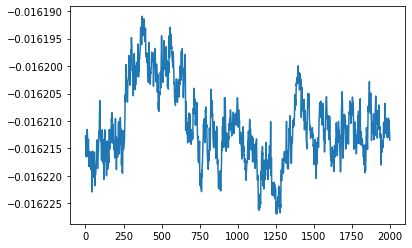

In [13]:
from matplotlib import pyplot as plt
plt.plot(raw[10,1:2000][0].T)

In [3]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 30 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
>

**Q:** What is the unit/scale of the data?
0.02V = 20000 µV

**T:** Have a look at `raw.info` and note down what the sampling frequency is (how many EEG-samples per second): 1024Hz

**T:** We will epoch the data now. Formost we will cut the raw data to one channel using `raw.pick_channels(["Cz"])` - not that this will permanently change the "raw" object and "deletes" alle other channels from memory. If you want rather a copy you could use `raw_subselect = raw.copy().pick_channels(["Cz"]))`.


In [14]:
raw.pick_channels(["Cz"])
#plt.plot(raw[:,:][0].T)

<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 1 x 414720 (405.0 s), ~3.2 MB, data loaded>

In [15]:
raw.info

<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 1 x 414720 (405.0 s), ~3.2 MB, data loaded>

**T:** MNE-speciality: We have to convert annotations to events 

In [22]:
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "response" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']


In [36]:
evts


array([[ 12243,      0,      2],
       [ 14299,      0,      2],
       [ 18819,      0,     22],
       ...,
       [406442,      0,      1],
       [407528,      0,      7],
       [407990,      0,      1]])

In [35]:
evts[1]

array([14299,     0,     2])

In [24]:
epochs = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1)

Not setting metadata
Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Need more than one channel to make topography for eeg. Disabling interactivity.


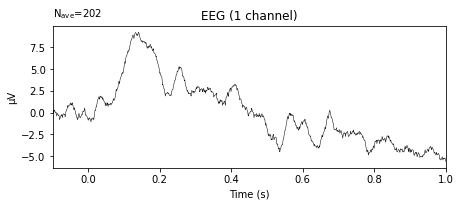

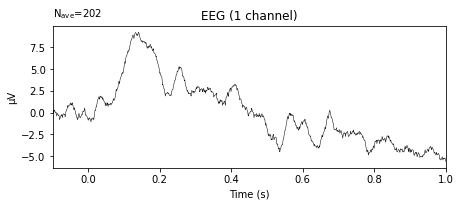

In [25]:
epochs.average().plot()

**T** Now that we have the epochs we should plot them. Plot all trials 'manually', without using mne's functionality (`epochs.get_data()`).

**Q** What is the unit/scale of the data now?: 0.0001 V = 100µV

Loading data for 200 events and 1127 original time points ...
0 bad epochs dropped


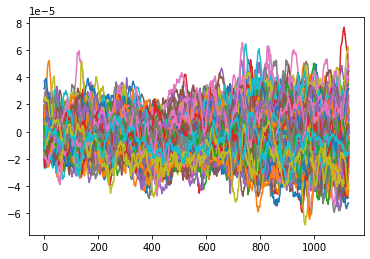

In [20]:
import numpy as np
plt.plot(np.squeeze(epochs.get_data()[:,0,:].T))


Now index the epochs `evoked = epochs[index].average()` and average them. You can then plot them either via `evoked.plot()` or with `mne.viz.plot_compare_evokeds([evokedA,evokedB])`.

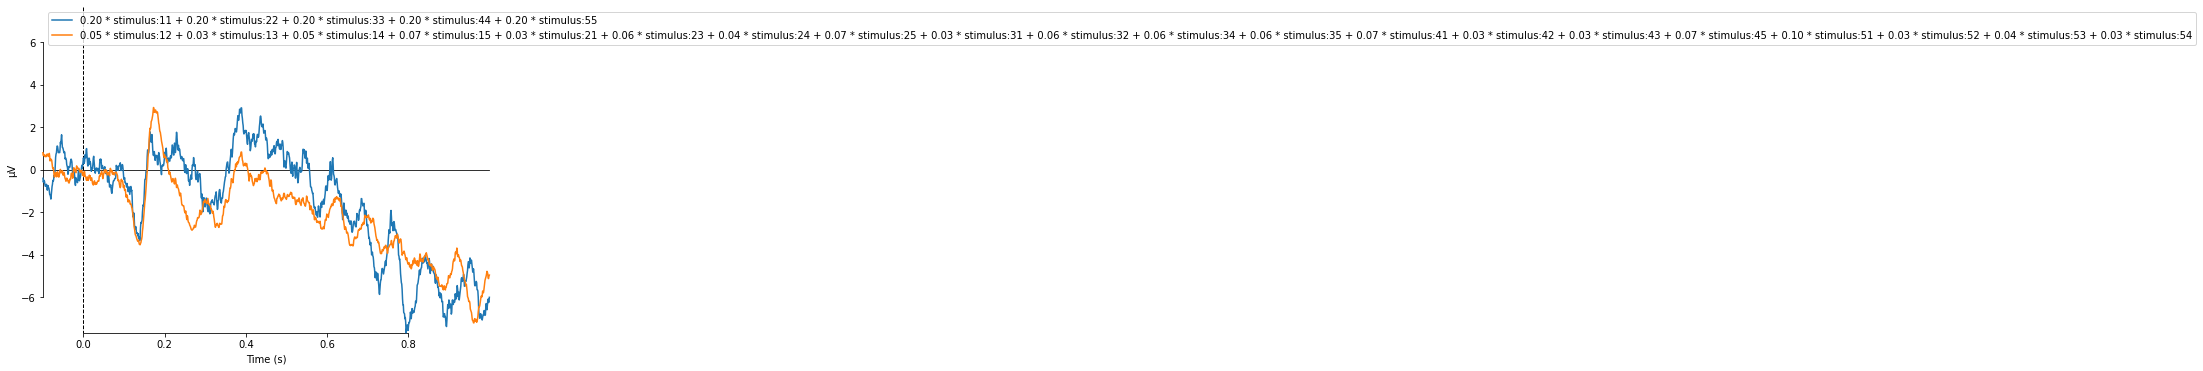

[<Figure size 576x432 with 1 Axes>]

In [8]:
target = epochs[["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]].average()
distractor = epochs[["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]].average()
mne.viz.plot_compare_evokeds([target,distractor])

**Q** What is the unit/scale of the data now? Set it into context to the other two scales you reported (**Q**'s higher up). 

20µV. So we went from 20.000µV to 100µV to 20µV
